In [2]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib 

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline


<div class="alert alert-block alert-warning">
    <h1><center> Hospital's Data Understanding and preparation </center></h1>

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The data depicts data gathered on hospital patients with and without cardiovascular disease, depicted by the target variable **_cardio_**, a common disease associated with a buildup of fatty deposits inside the arteries (blood vessels) of the heart. 
 
 -------
The case with data analysis projects, the features/variables have been retrieved from different sources: 
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days 
| sex | binary | Male/Female
| weight | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

In [3]:
# --- READ IN DATA 

data_path = "cardiovascular_disease_data.csv" 
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'weight':'int', 'ap_lo':'int', 'ap_hi':'int', 'sex': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'cholesterol':'category'}) 


In [6]:
# Showing  first 5 rows of the data and fetures separation
print(data.head())


numeric_features = list(data.select_dtypes(include=np.number).columns)
binary_features = list(data.select_dtypes(include="bool").columns)
categorical_features =  list(data.select_dtypes(include="category").columns)

print(numeric_features)
print(binary_features)
print(categorical_features)

     age    sex  height  weight  ap_hi  ap_lo  smoke  active  cardio   
0  19797  False     161      55    102     68  False    True   False  \
1  22571   True     178      68    120     70  False   False   False   
2  16621   True     169      69    120     80  False    True   False   
3  16688  False     156      77    120     80  False    True   False   
4  19498   True     170      98    130     80   True    True    True   

  cholesterol  
0    elevated  
1      normal  
2      normal  
3      normal  
4    elevated  
['age', 'height', 'weight', 'ap_hi', 'ap_lo']
['sex', 'smoke', 'active', 'cardio']
['cholesterol']


----------
### ***2a*** -  Print out the data types of your dataset below.


In [7]:
# Feature types of the dataset
print(data.dtypes)

age               int32
sex             boolean
height            int32
weight            int32
ap_hi             int32
ap_lo             int32
smoke           boolean
active          boolean
cardio          boolean
cholesterol    category
dtype: object


--------
***2 b)*** - Describing the data for generic information.   


In [8]:
# --- Your code for 2b) --- #

data.describe()

,age,height,weight,ap_hi,ap_lo
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


----------
***2c*** - Calculating descriptives for the binary (boolean) features and the categorical feature <br>



In [9]:
# 2d) Your code here #

data.describe(include=["bool"])


,sex,smoke,active,cardio
count,210,210,210,210
unique,2,2,2,2
top,False,False,True,False
freq,129,186,162,105


In [10]:
# Will read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# to calculate descriptives for the data that was wrongly read in. 
wrongly_read_data.describe()

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000




<font color = blue> The Boolean variables gave us wrong information since data for the said variable should be either one or other way around. For example in binary either "1" or "0". It was important to define tha data types in order to distinguish the variables and to avoid the missunderstanding of the data.   </font>

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** 

Let me plot the numeric features as histograms.


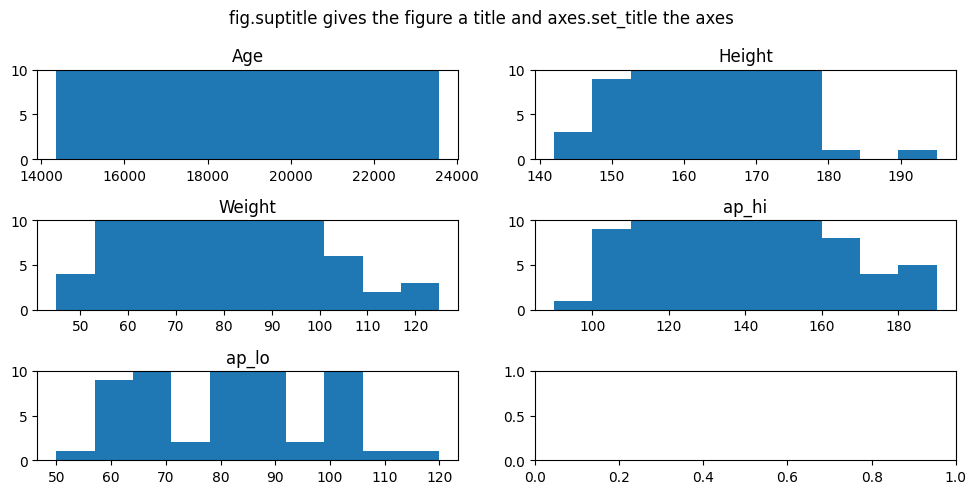

In [11]:
# --- Your code for 3a) here --- #
fig, axes = plt.subplots(3,2, figsize = (10,5)) # now axes have indexes like axes[i, j]
numeric_plot_titles = ['Age', 'Height', 'Weight', 'ap_hi', 'ap_lo' ]#some titles for the different axes


axes[0, 0].hist(data.age) #make a barplot
axes[0, 0].set_title(numeric_plot_titles[0]) #set a title for each axes
axes[0, 0].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

axes[0, 1].hist(data.height) #make a barplot
axes[0, 1].set_title(numeric_plot_titles[1]) #set a title for each axes
axes[0, 1].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

axes[1, 0].hist(data.weight) #make a barplot
axes[1, 0].set_title(numeric_plot_titles[2]) #set a title for each axes
axes[1, 0].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

axes[1, 1].hist(data.ap_hi) #make a barplot
axes[1, 1].set_title(numeric_plot_titles[3]) #set a title for each axes
axes[1, 1].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

axes[2, 0].hist(data.ap_lo) #make a barplot
axes[2, 0].set_title(numeric_plot_titles[4]) #set a title for each axes
axes[2, 0].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

fig.suptitle("fig.suptitle gives the figure a title and axes.set_title the axes")
plt.tight_layout()


_______
## 4. Plotting binary and categorical features

***4 a*** - Ploting  **barplots** for each of the non-numeric features. **using fractions, not the real frequencies of the levels of these features**.

--------------



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

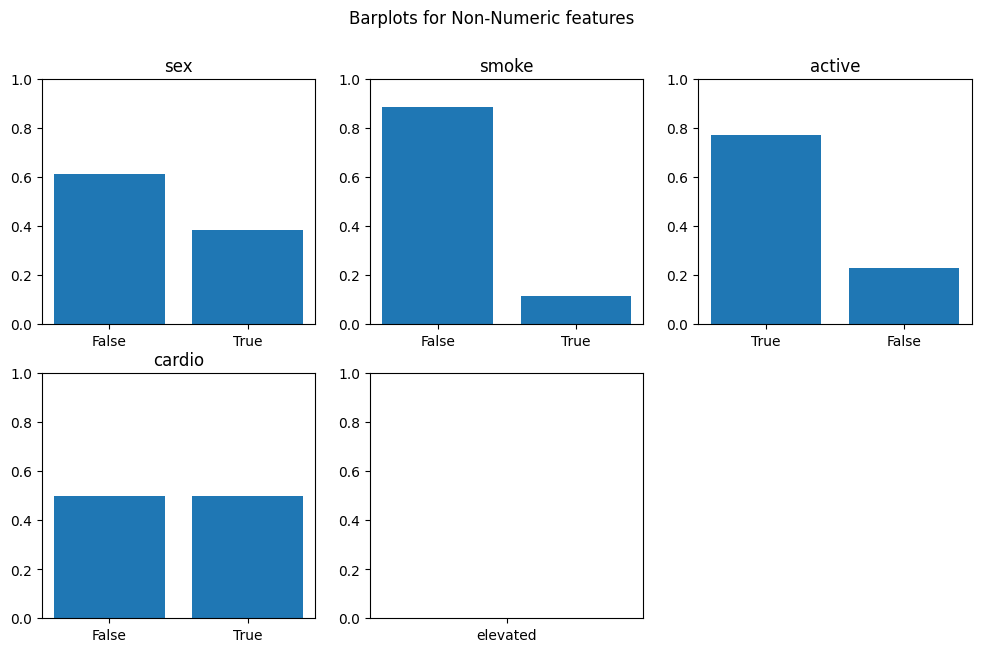

In [18]:
# --- Your code for 4a) here --- #

non_numeric_features = binary_features + categorical_features

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,7))
fig.delaxes(axes[1,2])
fig.suptitle('Barplots for Non-Numeric features')

for i, variable in enumerate(non_numeric_features):
    values = data[variable].value_counts(normalize=True)
    x = data[variable].unique().astype(str)
    axes[i//3, i%3].bar(x=x, height=values)
    axes[i//3, i%3].set_title(variable)
    axes[i//3, i%3].set_ylim((0,1))

plt.tight_layout()


-------------

## 5. Preprocessing numeric features

**5 a** - Min-max numeric attributes to [0,1] and **The resultsn stored in a new dataframe called data_min_maxed**. I might have to wrap the data to a dataframe again using pd.DataFrame()

In [19]:

# use the variable name data_min_maxed

data_min_maxed = pd.DataFrame(minmax_scale(data[numeric_features]),columns=numeric_features)
data_min_maxed.sample(10)

,age,height,weight,ap_hi,ap_lo
114,0.177430,0.301887,0.1000,0.10,0.142857
30,0.657752,0.509434,0.5000,0.60,0.714286
149,0.499891,0.584906,0.2875,0.30,0.428571
138,0.742227,0.433962,0.3750,0.30,0.428571
187,0.405523,0.490566,0.2500,0.30,0.428571
11,0.638617,0.415094,0.2000,0.30,0.428571
0,0.590346,0.358491,0.1250,0.12,0.257143
34,0.997065,0.415094,0.3000,0.30,0.428571
148,0.715590,0.509434,0.3750,0.30,0.428571
101,0.592411,0.452830,0.4375,0.40,0.428571


**5 b** - Standardizing numeric attributes to 0 mean and unit variance and **the results ae stored in a new dataframe called data_standardized**

In [21]:

data_standardized = pd.DataFrame(scale(data[numeric_features]),columns=numeric_features)
data_standardized.sample(10)

,age,height,weight,ap_hi,ap_lo
39,-0.781813,0.508076,0.761774,0.122679,-0.182819
50,-0.503258,-0.290148,0.418780,0.122679,0.824845
40,-0.807811,0.375039,-0.267209,-0.449822,-0.182819
55,0.001442,2.104524,2.339549,0.695180,-0.182819
173,-0.440944,-1.354447,-0.884599,-1.022324,0.824845
64,-0.161977,1.173263,1.790758,0.695180,0.824845
174,-0.867236,0.508076,-0.335808,-1.022324,-0.182819
21,-0.799971,0.774151,0.281582,-0.449822,-0.182819
63,0.528014,-1.088372,-0.747401,-0.449822,-2.198148
16,0.896120,0.108964,-0.816000,-0.449822,-0.182819


**5 c**- Showing two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles.

Text(0.5, 1.0, 'Standardized Age')

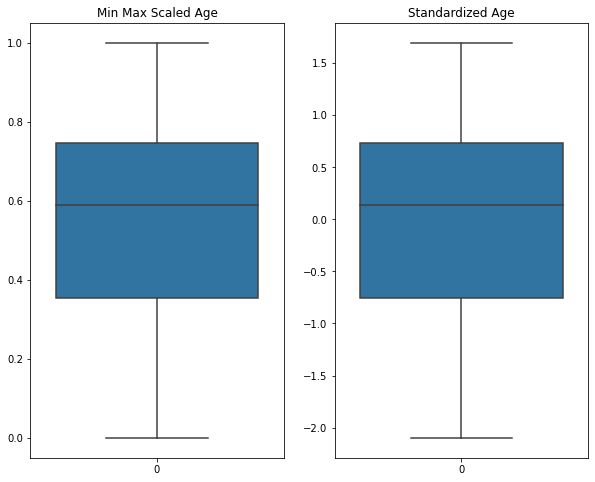

In [18]:


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(data= data_min_maxed["age"], ax = axes[0])
sns.boxplot(data= data_standardized["age"],ax = axes[1])

axes[0].set_title("Min Max Scaled Age")
axes[1].set_title("Standardized Age")

---------

Lets see the differences of these preprocessing methods through an example. I will add an "outlier" point (some point with a large value) to replace the 
last value in both data, then again minmax and standardize and plot. The code to add the value is given and I will not change it. 

--------------------


In [22]:
### Adding an outlier, 
data_w_outlier = data.copy()
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 
age_w_outlier = data_w_outlier.age

In [23]:
 
# create age_w_outlier_minmaxed, keep the names the same
age_w_outlier_minmaxed = pd.DataFrame(minmax_scale(data_w_outlier[numeric_features]),columns=numeric_features)

# create age_w_outlier_standardized
age_w_outlier_standardized = pd.DataFrame(scale(data_w_outlier[numeric_features]),columns=numeric_features)

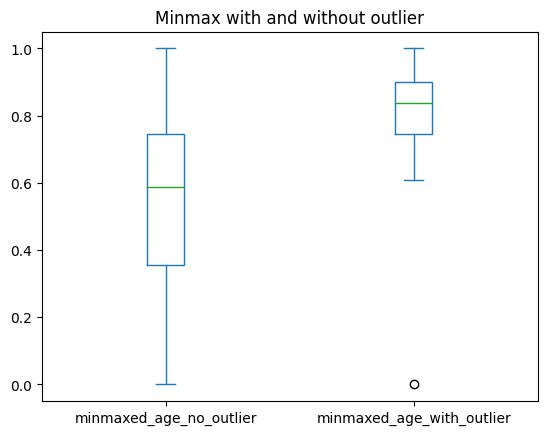

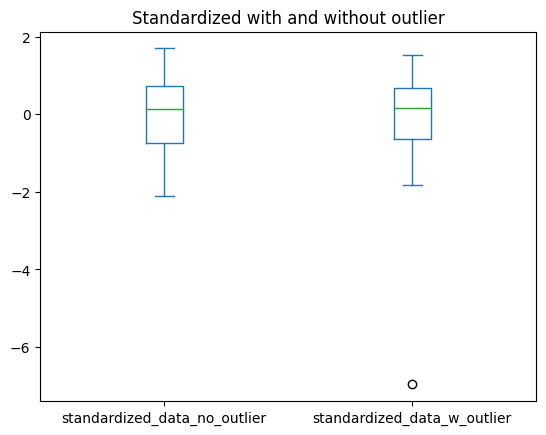

In [24]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age, 
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed.age })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized. 
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age, 
              "standardized_data_w_outlier": age_w_outlier_standardized.age })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')



<font color = blue> 
 I see the difference between both. Outliers are skewing the result looking at  min-maxed value while standarizing sustains the shape even without outliers. </font>

---------------
## 6. Preprocessing categorical features



**6 a** - One-hot-encode the cholesterol-feature and add the one-hot features to the data. Given the new features meaningful names. Print the first rows of the resulting dataframe. 

_tip: pandas has a function for this, google!_

In [25]:


data_hot_encoded = pd.get_dummies(data)
data_hot_encoded.head(1)

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio,cholesterol_at risk,cholesterol_elevated,cholesterol_normal
0,19797,False,161,55,102,68,False,True,False,False,True,False


----------